In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
left_wing = pd.read_csv('Data_Cleaning/Left_Wing_Data/is_left_wing.csv')
right_wing = pd.read_csv('Data_Cleaning/Right_Wing_Data/is_right_wing.csv')
all_english = pd.read_csv('Data_Cleaning/All_English/All_English_Tweets.csv')
all_english.drop_duplicates(subset='text', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
right_sample = right_wing.sample(1050)
left_sample = left_wing.sample(1050)

In [4]:
left_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [5]:
right_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [6]:
all_english_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [7]:
hostile_engagement = ["istandwithputin", "guns", "western propaganda", "propaganda", "united states",
    "lethal", "liberals", "conservatives", "socialists", "communists", "democrats", "republicans", "fascists", 
    "nuclear", "punish", "captured", "shelling"]

In [8]:
defensive_engagement = ["reinforce", "guard", "support", "suspend", "#ukraine",
    "propaganda", "calls", "call", "surrender", "abstain", "solider calls mom", "putinswar" ]

In [9]:
overlapping_engagement = ["seize", "ruble", "sanctions", "ukraine", "russia", 
    "breaking news", "breaking", "fox news"] 

In [10]:
unrelated_engagement = ["syria", "muslim", "fake news", "afghanistan", "palestinian", "israel"] 

In [11]:
for row in left_sample['text']:
    for word in hostile_engagement:
        if word in row:
            left_analysis['Hostile_Language'] += 1

for row in left_sample['text']:
    for word in defensive_engagement:
        if word in row:
            left_analysis['Defensive_Language'] += 1

for row in left_sample['text']:
    for word in overlapping_engagement:
        if word in row:
            left_analysis['Overlapping_Language'] += 1

for row in left_sample['text']:
    for word in unrelated_engagement:
        if word in row:
            left_analysis['Unrelated_Discussion'] += 1

In [12]:
left_analysis

{'Hostile_Language': 79,
 'Defensive_Language': 164,
 'Overlapping_Language': 110,
 'Unrelated_Discussion': 2}

In [13]:
for row in right_sample['text']:
    for word in hostile_engagement:
        if word in row:
            right_analysis['Hostile_Language'] += 1
            
for row in right_sample['text']:
    for word in defensive_engagement:
        if word in row:
            right_analysis['Defensive_Language'] += 1
            
for row in right_sample['text']:
    for word in overlapping_engagement:
        if word in row:
            right_analysis['Overlapping_Language'] += 1
    
for row in right_sample['text']:
    for word in unrelated_engagement:
        if word in row:
            right_analysis['Unrelated_Discussion'] += 1

In [14]:
right_analysis

{'Hostile_Language': 93,
 'Defensive_Language': 147,
 'Overlapping_Language': 112,
 'Unrelated_Discussion': 1}

In [15]:
# Used to get rid of the 1 float in the DF
all_english = all_english[all_english['text'].apply(lambda x: isinstance(x, str))]

for row in all_english['text']:
    for word in hostile_engagement:
        if word in row:
            all_english_analysis['Hostile_Language'] += 1
            
for row in all_english['text']:
    for word in defensive_engagement:
        if word in row:
            all_english_analysis['Defensive_Language'] += 1

for row in all_english['text']:
    for word in overlapping_engagement:
        if word in row:
            all_english_analysis['Overlapping_Language'] += 1

for row in all_english['text']:
    for word in unrelated_engagement:
        if word in row:
            all_english_analysis['Unrelated_Discussion'] += 1

In [16]:
right_table = pd.DataFrame.from_dict(right_analysis, orient='index')
right_table.rename(columns={0: 'Counts'}, inplace=True)
right_table

,Counts
Hostile_Language,93
Defensive_Language,147
Overlapping_Language,112
Unrelated_Discussion,1


In [17]:
left_table = pd.DataFrame.from_dict(left_analysis, orient='index')
left_table.rename(columns={0: 'Counts'}, inplace=True)
left_table

,Counts
Hostile_Language,79
Defensive_Language,164
Overlapping_Language,110
Unrelated_Discussion,2


In [18]:
all_english_analysis

{'Hostile_Language': 15664,
 'Defensive_Language': 47475,
 'Overlapping_Language': 52296,
 'Unrelated_Discussion': 719}

In [31]:
all_english

,userid,username,acctdesc,location,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count
0,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",40.0,94,1.497725e+18,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,No Information Provided,0.0
1,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,No Information Provided,9.0,656,1.497725e+18,2022-02-27 00:07:16,28,Like everybody else I am rooting for Ukraine t...,[],en,No Information Provided,0.0
2,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",No Information Provided,4080.0,33666,1.497725e+18,2022-02-27 00:07:16,1,We elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,No Information Provided,0.0
3,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,3950.0,466629,1.497725e+18,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,No Information Provided,0.0
4,2191952909,WyvernReports,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,6424.0,20689,1.497725e+18,2022-02-27 00:07:16,565,russian troops destroyed a commercial oil base...,[],en,No Information Provided,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700510,471330077,FranSchumacher1,No Information Provided,No Information Provided,392.0,34669,1.499173e+18,2022-03-02 23:59:55,112,@KuckelmanAshley President Volodymyr #Zelensky...,"[{'text': 'Zelenskyy', 'indices': [55, 65]}]",en,No Information Provided,0.0
1700511,1410502378416115717,AfricaUnitNow,Ukraine invasion: Would Putin press the nuclea...,Ukraine,245.0,205,1.499173e+18,2022-03-02 23:59:55,0,#UkraineRussiaWar Dead Russian soldiers near K...,"[{'text': 'UkraineRussiaWar', 'indices': [0, 1...",en,No Information Provided,0.0
1700512,3903376577,NkolaboniGh,"Medicine , food ,sports, treatment .......","Sekondi Takoradi, Ghana| Accra",372.0,1058,1.499173e+18,2022-03-02 23:59:55,2,@timkmak points to a growing food crisis in pa...,"[{'text': 'Ukraine', 'indices': [67, 75]}, {'t...",en,No Information Provided,0.0
1700513,291187461,MorbidSanctuary,Papercutting Artist & Author of YA Fiction 🌖 F...,NY,1263.0,1230,1.499173e+18,2022-03-02 23:59:55,0,My customers have asked for more Ukrainian dec...,"[{'text': 'standwithukraine', 'indices': [203,...",en,No Information Provided,0.0


In [19]:
february_tweets_by_time = all_english.loc[all_english['tweetcreatedts'] < '2022-03-01 00:00:00']
february_tweets_by_time.drop(['userid', 'username', 'acctdesc', 'location', 'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags', 'language', 'coordinates', 'favorite_count'], axis=1, inplace=True)
february_tweets_by_time.groupby('tweetcreatedts').count()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweetid
tweetcreatedts,
2022-02-27 00:07:16,20
2022-02-27 00:07:17,20
2022-02-27 00:07:18,18
2022-02-27 00:07:19,19
2022-02-27 00:07:20,17
...,...
2022-02-28 23:31:17,1
2022-02-28 23:31:18,5
2022-02-28 23:31:19,2


In [20]:
march_tweets_by_time = all_english.loc[all_english['tweetcreatedts'] > '2022-03-01 00:00:00']
march_tweets_by_time.drop(['userid', 'username', 'acctdesc', 'location', 'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags', 'language', 'coordinates', 'favorite_count'], axis=1, inplace=True)
march_tweets_by_time.groupby('tweetcreatedts').count()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweetid
tweetcreatedts,
2022-03-01 00:00:01,15
2022-03-01 00:00:02,6
2022-03-01 00:00:04,7
2022-03-01 00:00:05,6
2022-03-01 00:00:06,4
...,...
2022-03-02 23:59:52,1
2022-03-02 23:59:54,3
2022-03-02 23:59:55,4


In [21]:
march_tweets_by_time = march_tweets_by_time.drop(7590)

In [22]:
march_tweets_by_time

,tweetid,tweetcreatedts
794713,1.498448e+18,2022-03-01 00:00:01
794714,1.498448e+18,2022-03-01 00:00:01
794715,1.498448e+18,2022-03-01 00:00:01
794716,1.498448e+18,2022-03-01 00:00:01
794717,1.498448e+18,2022-03-01 00:00:01
...,...,...
1700510,1.499173e+18,2022-03-02 23:59:55
1700511,1.499173e+18,2022-03-02 23:59:55
1700512,1.499173e+18,2022-03-02 23:59:55
1700513,1.499173e+18,2022-03-02 23:59:55


In [29]:
m_c_time = march_tweets_by_time.groupby('tweetcreatedts').count()
m_time_list = []
m_count_list = []

for time in march_tweets_by_time['tweetcreatedts']:
        m_time_list.append(time)

set_m = set(m_time_list)
reset_m_list = list(set_m)
# print(len(reset_m_list))

for tweets in m_c_time['tweetid']:
    m_count_list.append(tweets)

# print(len(m_count_list))

print(sum(m_count_list[:1800]))


4560


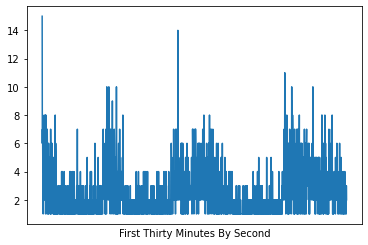

In [24]:
#Every ten-twelve minutes there are large spikes in the amount of tweets. This probably corresponds to breaking news
plt.plot(reset_m_list[:1800], m_count_list[:1800])
plt.xlabel('First Thirty Minutes By Second')
plt.xticks([])
plt.show()

In [25]:
#February Cleaned Time Tweets and lists for plotting purposes
f_c_time = february_tweets_by_time.groupby('tweetcreatedts').count()
f_time_list = []
f_count_list = []

for time in february_tweets_by_time['tweetcreatedts']:
        f_time_list.append(time)

set_f = set(f_time_list)
reset_f_list = list(set_f)
print(len(reset_f_list))

for tweets in f_c_time['tweetid']:
    f_count_list.append(tweets)

print(len(f_count_list))

#Access slice of February tweets here. Start with f_time_list[20] and f_count_list[20]


38286
38286


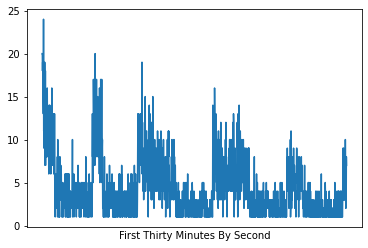

In [26]:
#Every ten-twelve minutes there are large spikes in the amount of tweets. This probably corresponds to breaking news
plt.plot(reset_f_list[:1800], f_count_list[:1800])
plt.xlabel('First Thirty Minutes By Second')
plt.xticks([])
plt.show()